In [1]:
import IPython, graphviz, re
from io import StringIO
from IPython.display import Image
import numpy as np
import pandas as pd
import math
from sklearn import tree
from sklearn.datasets import load_boston, load_iris
from collections import defaultdict
import string
import re
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# inspired by Mark Needham's blog
# https://markhneedham.com/blog/2017/09/23/python-3-create-sparklines-using-matplotlib/

#def sparkline(data, filename, fill=False, figsize=(4, 0.25), **kwags):
"""
Save a sparkline image
"""

boston = load_boston()

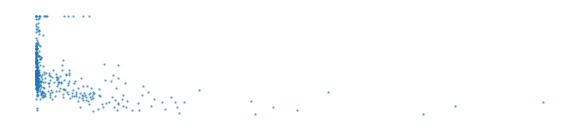

In [3]:
data = boston.data
feature_names = boston.feature_names
target = boston.target

fig, ax = plt.subplots(1, 1, figsize=(10,2))
ax.scatter(data[:,0], target, s=2, alpha=.5)
# ax.scatter(data[:,1], target, s=2)
# ax.scatter(data[:,2], target, s=2)
for k,v in ax.spines.items():
    v.set_visible(False)
ax.set_xticks([])
ax.set_yticks([])

plt.show()

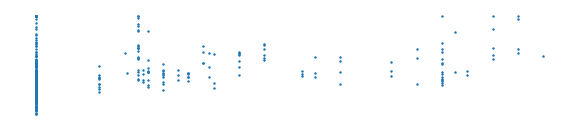

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(10,2))
ax.scatter(data[:,1], target, s=2)
for k,v in ax.spines.items():
    v.set_visible(False)
ax.set_xticks([])
ax.set_yticks([])

plt.show()

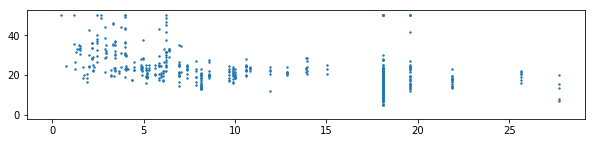

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(10,2))
X = data[:,2]
ax.scatter(X, target, s=2)
# for k,v in ax.spines.items():
#     v.set_visible(False)
# ax.set_xticks([])
# ax.set_yticks([])

ax.plot([min(X),])

plt.show()

In [10]:
from animl.trees import *

regr = tree.DecisionTreeRegressor(max_depth=4, random_state=666)
regr.fit(data, target)

shadow_tree = ShadowDecTree(regr, data, feature_names=feature_names)

root = shadow_tree.root

left, right = root.samples_split()
split = root.split()
# left = target[node_targets]
# right = node_targets[node_targets >= threshold[id]]
# print(np.mean(left), np.mean(right))

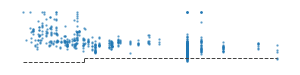

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(5,1))
X = data[:,2]
ax.scatter(X, target, s=2, alpha=.5)
for k,v in ax.spines.items():
    v.set_visible(False)
ax.set_xticks([])
ax.set_yticks([])

ax.plot([min(X),split],[np.mean(left),np.mean(left)],'--',color='#444443', linewidth=1)
ax.plot([split,split],[np.mean(left),np.mean(right)],'--',color='#444443', linewidth=1)
ax.plot([split,max(X)],[np.mean(right),np.mean(right)],'--',color='#444443', linewidth=1)

plt.show()

5
6.940999984741211
19.933720930232557 37.238157894736844


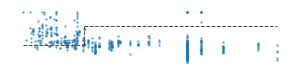

In [17]:
id = 1
feature = root.feature()
print(feature)
print(split)
left = target[data[:,feature] < split]
right = target[data[:,feature] >= split]
print(np.mean(left), np.mean(right))

fig, ax = plt.subplots(1, 1, figsize=(5,1))
X = data[:,2]
ax.scatter(X, target, s=2, alpha=.5)
for k,v in ax.spines.items():
    v.set_visible(False)
ax.set_xticks([])
ax.set_yticks([])

ax.plot([min(X),split],[np.mean(left),np.mean(left)],'--',color='#444443', linewidth=1)
ax.plot([split,split],[np.mean(left),np.mean(right)],'--',color='#444443', linewidth=1)
ax.plot([split,max(X)],[np.mean(right),np.mean(right)],'--',color='#444443', linewidth=1)

plt.show()